<a href="https://colab.research.google.com/github/jessmiramontes/deep_learning/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification system
The dataset is composed of dog and cat photos provided as a subset of photos from a much larger collection of 3 million manually annotated photos. This data was obtained through a collaboration between Petfinder.com and Microsoft.

The data set was originally used as a CAPTCHA, i.e., a task that a human is believed to find trivial, but that a machine cannot solve, which is used on websites to distinguish between human users and bots. The task was named "Asirra". When "Asirra" was introduced, it was mentioned "that user studies indicate that humans can solve it 99.6% of the time in less than 30 seconds." Barring a breakthrough in computer vision, we expect that computers will have no more than a 1/54,000 chance of solving it.

At the time the competition was published, the state-of-the-art result was achieved with an SVM and was described in a 2007 paper with the title "Machine Learning Attacks against Asirra's CAPTCHA" (PDF) that achieved 80% classification accuracy. It was this paper that showed that the task was no longer a suitable task for a CAPTCHA shortly after the task was proposed.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Packages
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

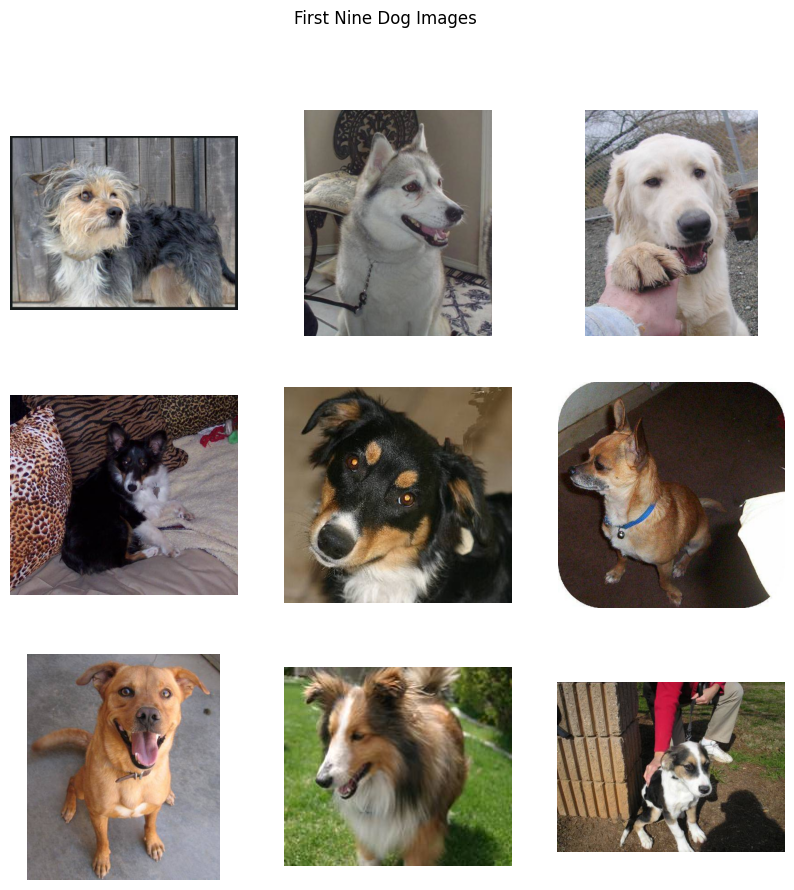

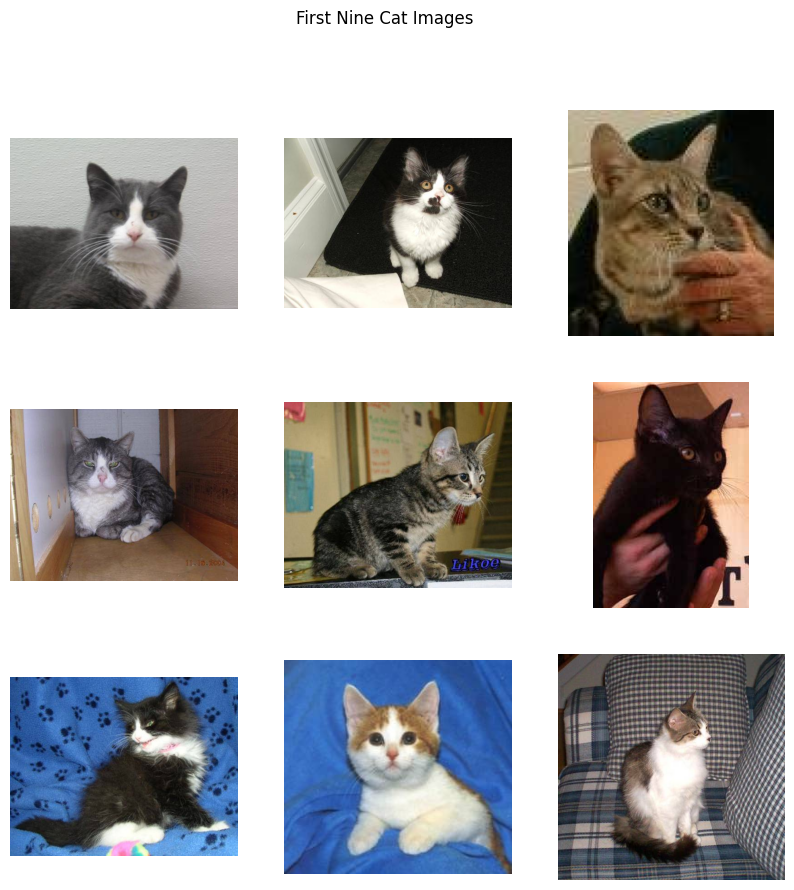

In [ ]:
# Import and Check first 9 Dog Pictures

# Path to the directory containing your image data
folder_path = '/content/drive/MyDrive/train'

# Get list of dog and cat images
dog_images = [f for f in os.listdir(folder_path) if f.startswith('dog')]
cat_images = [f for f in os.listdir(folder_path) if f.startswith('cat')]

def display_images_keras(image_list, title):
  plt.figure(figsize=(10,10))
  for i in range(9):
    img_path = os.path.join(folder_path, image_list[i])
    img = image.load_img(img_path)
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.axis('off')
  plt.suptitle(title)
  plt.show()

# Display the first nine dog images
display_images_keras(dog_images, 'First Nine Dog Images')
# Display the first nine cat images
display_images_keras(cat_images, 'First Nine Cat Images')

In [15]:
# Resize images
resized_folder_path = '/content/drive/MyDrive/train_resized'


def resize_and_save_images(image_list):
  for img_name in image_list:
    save_path = os.path.join(resized_folder_path, img_name)
    # Check if the resized image already exists
    if not os.path.exists(save_path):
      img_path = os.path.join(folder_path, img_name)
      img = image.load_img(img_path, target_size=(200, 200))
      img_array = img_to_array(img)
      img_resized = array_to_img(img_array)
      img_resized.save(save_path)

# Resize all dog and cat images
resize_and_save_images(dog_images)
resize_and_save_images(cat_images)

In [18]:
import shutil

dog_dir = os.path.join(resized_folder_path, 'dog')
cat_dir = os.path.join(resized_folder_path, 'cat')

# Create directories if they don't exist
os.makedirs(dog_dir, exist_ok=True)
os.makedirs(cat_dir, exist_ok=True)

# Move images to respective directories
for file_name in os.listdir(folder_path):
    if file_name.startswith('dog'):
        shutil.move(os.path.join(folder_path, file_name), os.path.join(dog_dir, file_name))
    elif file_name.startswith('cat'):
        shutil.move(os.path.join(folder_path, file_name), os.path.join(cat_dir, file_name))

print("Files have been moved to their respective directories.")



Files have been moved to their respective directories.


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the ImageDataGenerator object
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Here we also create a validation split

# Create a training dataset
train_generator = datagen.flow_from_directory(
    resized_folder_path,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',  # Use 'categorical' for more than two classes
    subset='training'  # Specify subset as training data
)

# Create a validation dataset
validation_generator = datagen.flow_from_directory(
    resized_folder_path,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',  # Use 'categorical' for more than two classes
    subset='validation'  # Specify subset as validation data
)


Found 20139 images belonging to 2 classes.
Found 5034 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(input_shape=(200, 200, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))  # Assuming binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=1, validation_data=validation_generator)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/630 ━━━━━━━━━━━━━━━━━━━━ 9:03:43 65s/step - accuracy: 0.4950 - loss: 0.7282